# Predicting heart disease using machine learning

This notebook looks into usnig various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling 
6. Experimentation

## 1. Problem defination

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository.
([**`Original DataSet`**](https://archive.ics.uci.edu/ml/datasets/Heart+Disease))

There is also a version of it available on kaggle. 
([**`Kaggle Dataset`**](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci))

## 3. Evaluation

> If we reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where we'll get different information about each of the features in your data.

**Create data dictionary**

1. **age**: age in years
2. **sex**: sex (1 = male; 0 = female)
3. **cp**: chest pain type 
     * Value 0: typical angina
     * Value 1: atypical angina
     * Value 2: non-anginal pain
     * Value 3: asymptomatic
4. **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
5. **chol**: serum cholestoral in mg/dl 
6. **fbs**: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. **restecg**: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **thalach**: maximum heart rate achieved
9. **exang**: exercise induced angina (1 = yes; 0 = no)
10. **oldpeak** = ST depression induced by exercise relative to rest
11. **slope**: the slope of the peak exercise ST segment
    * Value 0: upsloping
    * Value 1: flat
    * Value 2: downsloping
12. **ca**: number of major vessels (0-3) colored by flourosopy
13. **thal**: 0 = normal; 1 = fixed defect; 2 = reversable defect and the label
14. **condition**: 
     * 0 = no disease
     * 1 = disease

# Preparing the tools

We're going to use Pandas, NumPy and Matplotlib for data analysis and manipulation

In [1]:
# Import all the tools we need

# Regular EDA(Exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# We want our plot to appear inside the notebook
%matplotlib inline

# Model from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Data Exploratory (Exploratory Data Analysis or EDA)

The goal here is to find more about our data and to become a subjet matter expert ont he dataset we're working.

1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat differnt types?
3. What's missing with the data and how do we deal with it?
4. Where are the ouliers and why should you care about them?
5. How can add, change and remove features to get more out of your data

### Load Data

In [2]:
df = pd.read_csv("heart_cleveland_upload.csv")

In [3]:
# Total No. of rows and Columns
df.shape

(297, 14)

In [4]:
# First 5 rows of the DataFrame
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
# Last 5 rows of the DataFrame
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [6]:
# Info about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [7]:
# Describing data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [8]:
# Checking null values
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

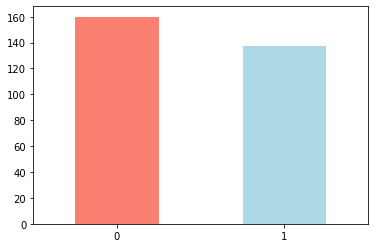

In [9]:
# plotting condition on bar graph
df["condition"].value_counts().plot(kind='bar', color=["salmon", "lightblue"])
plt.xticks(rotation=0);

## Heart Disease Frequency according to sex

In [10]:
df["sex"].value_counts()

1    201
0     96
Name: sex, dtype: int64

In [11]:
# Compare condition column with sex column
pd.crosstab( df["condition"],df["sex"])

sex,0,1
condition,,
0,71,89
1,25,112


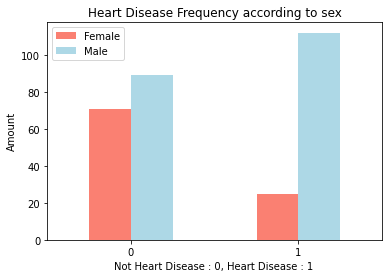

In [12]:
# Plotting crosstab of sex and condition columns
pd.crosstab( df["condition"],df["sex"]).plot(kind = 'bar',
                                             color = ["salmon", "lightblue"])

plt.title("Heart Disease Frequency according to sex")
plt.xlabel("Not Heart Disease : 0, Heart Disease : 1 ")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

## Age vs. Max Heart Rate for Heart Disease

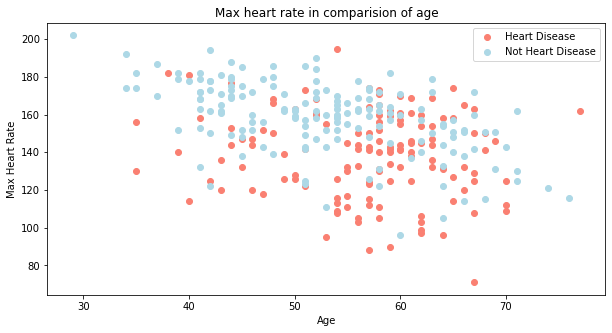

In [13]:
# Create another figure
plt.figure(figsize=(10,5))

# Scatter with positive values
plt.scatter(df.age[df.condition==1],
            df.thalach[df.condition==1], color="salmon")

# Scatter with negative values
plt.scatter(df.age[df.condition==0],
            df.thalach[df.condition==0], color="lightblue")

plt.title("Max heart rate in comparision of age")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease", "Not Heart Disease"]);

## Heart Disease Frequency per Chest Pain Type
**cp**: chest pain types-
   * Value 0: typical angina
   * Value 1: atypical angina
   * Value 2: non-anginal pain
   * Value 3: asymptomatic

In [14]:
df["cp"].value_counts()

3    142
2     83
1     49
0     23
Name: cp, dtype: int64

In [15]:
pd.crosstab(df.cp,df.condition)

condition,0,1
cp,,
0,16,7
1,40,9
2,65,18
3,39,103


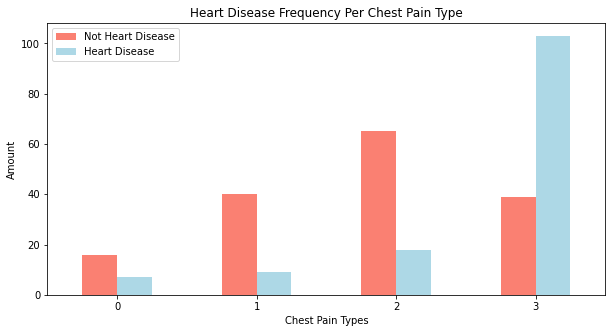

In [16]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.condition).plot(kind='bar', 
                                      figsize = (10,5),
                                      color = ["salmon","lightblue"])
# Set the lables
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Types")
plt.ylabel("Amount")
plt.legend(["Not Heart Disease", "Heart Disease"])
plt.xticks(rotation=0);

## Now we see Correlation Matrix of our DataFrame

In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


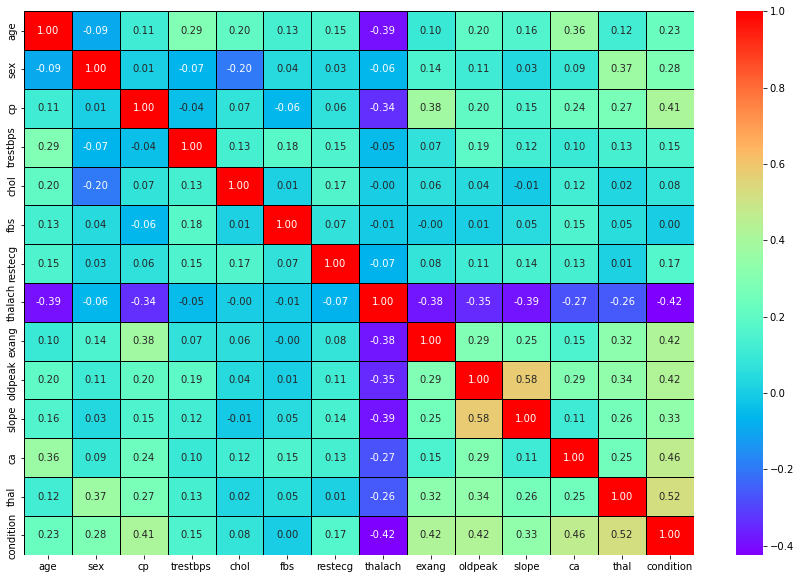

In [18]:
# Create more visual Corrilaton Matrix
corr_df = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_df,
                 annot = True,
                 cmap = "rainbow",
                 fmt ='.2f',
                linewidths=0.5,
                linecolor="black")

# 5. Modelling

In [19]:
# Create x and y
x = df.drop("condition", axis=1)
y = df["condition"]

In [20]:
# Setting Random seed
np.random.seed(42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Now we've got our data split into trainig and test sets, it's time to build a machine learning model

We'll train it(find the pattern) on the traning set.

And we'll test it(use the pattern) on the test set.

we're going to try 3 diffrent machine learning model

1. LogisticRegression
2. KNeighborsClassifier
3. RandomForestClassifier

In [21]:
# Put model in a dictionary
models = {"Logistic Regression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()
         }

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fit and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data(no lables)
    X_test : testing data(no lables)
    y_train : tranning lables
    y_test : testing lables
    """
    # Set Random Seed
    np.random.seed(42)
    
    # Create empty dictionary to keep the model scores
    model_scores = {}
    
    # Loop through models
    for name,model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores
        

In [22]:
model_scores = fit_and_score(models = models, 
                             X_train = X_train, 
                             X_test = X_test, 
                             y_train = y_train, 
                             y_test = y_test)
model_scores

C:\Users\krman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.75, 'KNN': 0.5666666666666667, 'Random Forest': 0.7}

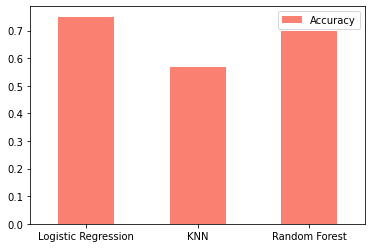

In [23]:
# Creating model_scores Visual
model_scores_df = pd.DataFrame(model_scores, index=["Accuracy"])
model_scores_df.T.plot(kind="bar", color="salmon")
plt.xticks(rotation=0);

Now we've got a baseline model and we can see that model's first prediction aren't that good.

So we can look for the following:
* Hyperparameters tunning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification
* ROC curve
* Area Under Curve (AUC)

## Hyperparametre Tunning

In [24]:
# Let's tune KNN

# Create empty list of train and test score
train_score = []
test_score = []

# Create list of diffrent values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train,y_train)
    
    # Update the training scores list
    train_score.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_score.append(knn.score(X_test, y_test))

In [25]:
train_score

[1.0,
 0.7974683544303798,
 0.8016877637130801,
 0.7890295358649789,
 0.7763713080168776,
 0.7679324894514767,
 0.7679324894514767,
 0.7637130801687764,
 0.7383966244725738,
 0.7257383966244726,
 0.7257383966244726,
 0.7257383966244726,
 0.7257383966244726,
 0.729957805907173,
 0.7383966244725738,
 0.7215189873417721,
 0.7383966244725738,
 0.7426160337552743,
 0.7552742616033755,
 0.7510548523206751]

In [26]:
test_score

[0.5166666666666667,
 0.5333333333333333,
 0.48333333333333334,
 0.5333333333333333,
 0.5666666666666667,
 0.55,
 0.55,
 0.5166666666666667,
 0.5833333333333334,
 0.5666666666666667,
 0.6166666666666667,
 0.6,
 0.5833333333333334,
 0.5833333333333334,
 0.6166666666666667,
 0.6166666666666667,
 0.6166666666666667,
 0.6,
 0.6,
 0.6]

Maximum KNN Score on the test score: 61.67


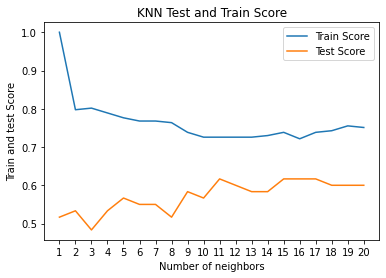

In [27]:
plt.plot(neighbors, train_score, label = "Train Score")
plt.plot(neighbors, test_score, label = "Test Score")
plt.xticks(np.arange(1,21,1))
plt.title("KNN Test and Train Score")
plt.xlabel("Number of neighbors")
plt.ylabel("Train and test Score")
plt.legend()

print(f"Maximum KNN Score on the test score: {max(test_score)*100:.2f}")

## Hyperparameter tuning with RandomizedSearchCV

we're going to tune:
* LogisticRegression()
* RandomForestClassifier()

...Using RandomizedSearchCV

In [28]:
# Create a hyperparameter grid for LogisticRegression and RandomForestClassifer
log_reg_grid = {"C" : np.logspace(-4, 4, 50),
                "solver" : ["liblinear"]}

rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [29]:
# Let's Tune Logistic Regression

np.random.seed(42)

# Setup Random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                n_iter=50,
                                cv=20,
                                verbose=True)

# Fit Random hyperparameter serach model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 20 folds for each of 50 candidates, totalling 1000 fits


RandomizedSearchCV(cv=20, estimator=LogisticRegression(), n_iter=50,
                   param_distributions={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [30]:
# Check best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08685113737513521}

In [31]:
# Evaluate the Randomized search Logistic Regression model
rs_log_reg.score(X_test, y_test)

0.7333333333333333

In [32]:
model_scores

{'Logistic Regression': 0.75, 'KNN': 0.5666666666666667, 'Random Forest': 0.7}

In [33]:
# Let's Tune RandomForest Classifier

np.random.seed(42)

# Setup Random hyperparameter search for RandomForest Classifier
rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            n_iter=30,
                            cv=10,
                            verbose=True)

# Fit Random hyperparameter serach model for RandomForest Classifier
rs_rfc.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [34]:
# Check best parameters
rs_rfc.best_params_

{'n_estimators': 260,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [35]:
# Evaluate the Randomized search RandomForestClassifier model
rs_rfc.score(X_test,y_test)

0.7833333333333333

In [36]:
model_scores

{'Logistic Regression': 0.75, 'KNN': 0.5666666666666667, 'Random Forest': 0.7}

## Hyperparameter tuning with GridSearchCV

Since our RandomForestClassifier model provides the best scores so far, we'll try and improve them again usnig GrideSearchCV...  

In [37]:
log_reg_grid = {"C" : np.logspace(-4, 4, 50),
                "solver" : ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid=log_reg_grid,
                                cv=5,
                                verbose=True)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.685113...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
gs_log_reg.score(X_test,y_test)

0.7333333333333333

In [39]:
gs_log_reg.best_params_

{'C': 0.08685113737513521, 'solver': 'liblinear'}

In [40]:
# Create a hyperparameter grid for RandomForestClassifer
# rf_grid = {"n_estimators" : np.arange(10, 100, 50),
#            "max_depth" : [None, 3, 5, 10,],
#            "min_samples_split" : np.arange(2, 10, 2),
#            "min_samples_leaf" : np.arange(1, 10, 2)}

rf_grid = {"n_estimators" : [60],
           "max_depth" : [None],
           "min_samples_split" : [4],
           "min_samples_leaf" :[5]}

# Setup Random hyperparameter search for RandomForest Classifier
gs_rfc = GridSearchCV(RandomForestClassifier(),
                      param_grid=rf_grid,
                      cv=3,
                      n_jobs = -1,
                      verbose=True)

# Fit Random hyperparameter serach model for RandomForest Classifier
gs_rfc.fit(X_train, y_train);

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [41]:
# Check the best hyperparameter
gs_rfc.best_params_

{'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 60}

In [42]:
# Evaluate the grid search RandomForestClassifier model
gs_rfc.score(X_test, y_test)

0.7833333333333333

## Evaluating our tuned Machine Learning Classifier, beyond accuracy

* ROC Curve and AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score

.....and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [43]:
# Make Prediction with tunned model
y_preds = gs_rfc.predict(X_test)
y_preds

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [44]:
y_probs = gs_rfc.predict_proba(X_test)
y_positive = y_probs[:,1]
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_positive)
fpr

array([0.     , 0.     , 0.     , 0.03125, 0.03125, 0.09375, 0.09375,
       0.125  , 0.125  , 0.28125, 0.28125, 0.375  , 0.375  , 0.53125,
       0.53125, 0.65625, 0.65625, 1.     ])

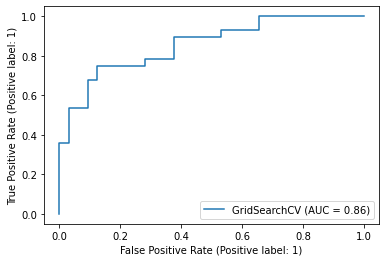

In [45]:
# Plot ROC Curve and calculate AUC metrics
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(gs_rfc, X_test, y_test)

In [46]:
# Confusion Matrix
confusion_matrix(y_test,y_preds)

array([[26,  6],
       [ 7, 21]], dtype=int64)

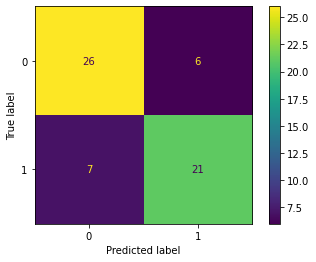

In [47]:
# Make Comfusion Matrx more visible
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

Now we've got a ROC curve, an AUC metric and a confusuion matrix, let's get a classification report
as well as cross-validated precision, recall and f1-score.

In [48]:
# Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        32
           1       0.78      0.75      0.76        28

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



## Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [49]:
# Check best hyperparameters
gs_rfc.best_params_

{'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 60}

In [50]:
# Create a new classifier with best parameters
clf = RandomForestClassifier(n_estimators = 60,
                             min_samples_leaf = 5,
                             min_samples_split = 4,
                             max_depth = None)

In [51]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, x, y, scoring="accuracy")
cv_acc = cv_acc.mean()
cv_acc

0.7609604519774011

In [52]:
# Cross-validated precision
cv_precision = cross_val_score(clf, x, y, scoring="precision")
cv_precision = cv_precision.mean()
cv_precision

0.7936030786871373

In [53]:
# Cross-validated recall
cv_recall = cross_val_score(clf, x, y, scoring="recall")
cv_recall = cv_recall.mean()
cv_recall

0.6677248677248676

In [54]:
# Cross-validated f1-score
cv_f1_score = cross_val_score(clf, x, y, scoring="f1")
cv_f1_score = cv_f1_score.mean()
cv_f1_score

0.7034094362372686

In [55]:
# Create visualization of accuracy, precision, recall, f1-score
df_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                         "Precision" : cv_precision,
                         "Recall" : cv_recall,
                         "F1-score" : cv_f1_score},
                         index=[0])

df_metrics

,Accuracy,Precision,Recall,F1-score
0,0.76096,0.793603,0.667725,0.703409


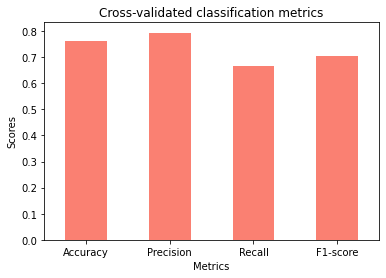

In [56]:
df_metrics.T.plot.bar(color = "salmon" ,legend = False)
plt.xticks(rotation=0)
plt.title("Cross-validated classification metrics")
plt.xlabel("Metrics")
plt.ylabel("Scores");

## Feature Importance

Feature importance is another asking, "which feature contributes most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance fro our RandomForest Classifier model...

In [60]:
# Fit an instance of RandomForest Classifier 
clf = RandomForestClassifier(n_estimators = 60,
                             min_samples_leaf = 5,
                             min_samples_split = 4,
                             max_depth = None)

clf.fit(X_train, y_train);

In [62]:
# Check feature importance
clf.feature_importances_

array([0.05873762, 0.04642809, 0.11731541, 0.04966463, 0.04276265,
       0.00134239, 0.01118066, 0.13426377, 0.06848821, 0.09973507,
       0.03581255, 0.13107346, 0.2031955 ])

In [64]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [67]:
# Match feature importance to columns
feature_dict = dict(zip(df.columns, list(clf.feature_importances_)))
feature_dict

{'age': 0.058737619624789766,
 'sex': 0.04642808817622523,
 'cp': 0.11731540745891923,
 'trestbps': 0.049664631320877936,
 'chol': 0.04276265171046093,
 'fbs': 0.0013423895991266552,
 'restecg': 0.01118065967658176,
 'thalach': 0.13426377254760719,
 'exang': 0.06848820768964672,
 'oldpeak': 0.09973506702812575,
 'slope': 0.03581254653025081,
 'ca': 0.13107346224224908,
 'thal': 0.20319549639513904}

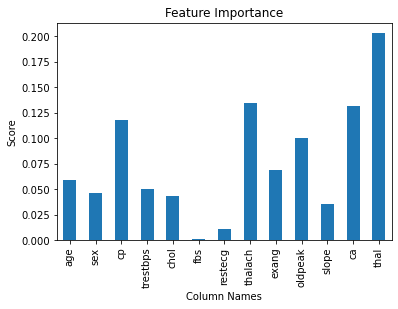

In [96]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(legend=False)
plt.title("Feature Importance")
plt.xlabel("Column Names")
plt.ylabel("Score");

# 6. Expertimentation

If you haven't hit your evaluation metric yet....ask yourself..

* Could you collect more data?
* Could you try a better model? Like CatBoost or XHBoost?
* Could you improve the current models? (beyond what we've done so far)
* If you model is good enough (you have hit your evaluation metrics) how would you export it and share it with others?